# Smit Kumbhani 114964474
# Mitesh Jalan 115222506
# Pritish Thombare 115382224

In [133]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/My Drive/ProbStatsProject/OriginalDallas97-22.csv', sep =',')
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           DATE  CPI_all_items  Rent_of_Primary_residence  \
0    1997-01-01        159.400                    140.400   
1    1997-02-01        159.700                    140.500   
2    1997-03-01        159.800                    140.500   
3    1997-04-01        159.900                    141.000   
4    1997-05-01        159.900                    140.800   
..          ...            ...                        ...   
307  2022-08-01        295.320                    326.759   
308  2022-09-01        296.539                    330.192   
309  2022-10-01        297.987                    333.473   
310  2022-11-01        298.598                    338.266   
311  2022-12-01        298.990                    341.333   

    Monthly_Housing_Cost  CPI_Energy  US_Dollar_Purchasing_power  
0                      .     126.000                        62.8  
1   

3.1

In [134]:
#Tukey
cols = list(data.columns)
#cols withou DATE
cpi_cols = cols[1:]
alpha = 1.5
def getLimits(values):
  values.sort()
  length = len(values)
  q1 = values[math.ceil((1/4)*length)-1]
  q3 = values[math.ceil((3/4)*length)-1]
  IQR = q3-q1
  right = q3 + alpha*IQR
  left = q1 - alpha*IQR
  return left, right


def removeOutliers(data, col):
  clist = data[col].tolist()
  clist = [float(c) for c in clist if c != '.']
  left, right = getLimits(clist)
  print('Limits : ', round(left,2), round(right,2))
  df = data.apply(lambda x : True if (x[col] != '.' and (float(x[col]) > right or float(x[col]) < left)) else False, axis = 1)
  outliers = len(df[df == True].index)
  print('Outliers in the column: ', col, outliers)
  data[col] = data.apply(lambda x: '.' if (x[col] != '.' and (float(x[col]) > right or float(x[col]) < left)) else x[col], axis=1)

for col in cpi_cols:
  removeOutliers(data, col)
#count the number of outliers in each column


Limits :  99.1 324.7
Outliers in the column:  CPI_all_items 0
Limits :  73.28 331.74
Outliers in the column:  Rent_of_Primary_residence 3
Limits :  102.46 264.97
Outliers in the column:  Monthly_Housing_Cost 4
Limits :  76.45 306.18
Outliers in the column:  CPI_Energy 6
Limits :  22.3 73.5
Outliers in the column:  US_Dollar_Purchasing_power 0


3.2

In [135]:
#Interpolation

edgevals = {'CPI_all_items':[159.400, 298.900], 'Rent_of_Primary_residence':[164.400, 385.649], 'Monthly_Housing_Cost':[155.100, 310.725], 'CPI_Energy':[115.200, 287.176], 'US_Dollar_Purchasing_power':[62.8, 33.7]}
def interpolation(data, col, edge):
  ls = data[col].tolist()
  ls.append(edge[col][1])
  ls.insert(0,edge[col][0])
  #print(ls)

  for i in range(1,len(ls)-1):
    if ls[i] == '.':
      up = i-1
      down = -1
      #getting the next know value
      for j in range(i, len(ls)):
        if ls[j] != '.':
          down = j
          break
      slope = (float(ls[down]) - float(ls[up]))/(down-up)
      missing = float(ls[up]) + slope*(i-up)
      ls[i] = round(missing,3)

  ls = ls[1:-1]
  ls = [float(v) for v in ls]
  data[col] = ls

for col in cpi_cols:
  interpolation(data, col, edgevals)

print(data)

           DATE  CPI_all_items  Rent_of_Primary_residence  \
0    1997-01-01        159.400                    140.400   
1    1997-02-01        159.700                    140.500   
2    1997-03-01        159.800                    140.500   
3    1997-04-01        159.900                    141.000   
4    1997-05-01        159.900                    140.800   
..          ...            ...                        ...   
307  2022-08-01        295.320                    326.759   
308  2022-09-01        296.539                    330.192   
309  2022-10-01        297.987                    344.056   
310  2022-11-01        298.598                    357.920   
311  2022-12-01        298.990                    371.784   

     Monthly_Housing_Cost  CPI_Energy  US_Dollar_Purchasing_power  
0                 146.500     126.000                        62.8  
1                 137.900     129.200                        62.6  
2                 137.300     118.200                        62

3.4 KS Test and Permutation Test

In [136]:
#Normalizing the data

data['CPI_all_items_per_change'] = data['CPI_all_items'].pct_change()
data['Rent_of_Primary_residence_per_change'] = data['Rent_of_Primary_residence'].pct_change()
data['Monthly_Housing_Cost_per_change'] = data['Monthly_Housing_Cost'].pct_change()
data['CPI_Energy_per_change'] = data['CPI_Energy'].pct_change()
data['US_Dollar_Purchasing_power_per_change'] = data['US_Dollar_Purchasing_power'].pct_change()

#Removing negative values and interpolating them for some distributions
#Replacing negative values with a '.'
data['Monthly_Housing_Cost_per_change_pos'] = data.apply(lambda x: '.' if (x['Monthly_Housing_Cost_per_change'] < 0 or np.isnan(x['Monthly_Housing_Cost_per_change'])) else x['Monthly_Housing_Cost_per_change'], axis=1)
data['CPI_all_items_per_change_pos'] = data.apply(lambda x: '.' if (x['CPI_all_items_per_change'] < 0 or np.isnan(x['CPI_all_items_per_change'])) else x['CPI_all_items_per_change'], axis=1)
data['Rent_of_Primary_residence_per_change_pos'] = data.apply(lambda x: '.' if (x['Rent_of_Primary_residence_per_change'] < 0 or np.isnan(x['Rent_of_Primary_residence_per_change'])) else x['Rent_of_Primary_residence_per_change'], axis=1)
data['CPI_Energy_per_change_pos'] = data.apply(lambda x: '.' if (x['CPI_Energy_per_change'] < 0 or np.isnan(x['CPI_Energy_per_change'])) else x['CPI_Energy_per_change'], axis=1)
data['US_Dollar_Purchasing_power_per_change_pos'] = data.apply(lambda x: '.' if (x['US_Dollar_Purchasing_power_per_change'] < 0 or np.isnan(x['US_Dollar_Purchasing_power_per_change'])) else x['US_Dollar_Purchasing_power_per_change'], axis=1)

#Interpolating the per_change data to get positive values.
#Placing 0.0 before and after the list of values for interpolation.
edgevals_pos = {'CPI_all_items_per_change_pos':[0.0, 0.0], 'Rent_of_Primary_residence_per_change_pos':[0.0, 0.0], 'Monthly_Housing_Cost_per_change_pos':[0.0, 0.0], 'CPI_Energy_per_change_pos':[0.0, 0.0], 'US_Dollar_Purchasing_power_per_change_pos':[0.0, 0.0]}
for col in cpi_cols:
  col = col + '_per_change_pos'
  interpolation(data, col, edgevals_pos)

data.fillna(0, inplace=True)


1 Sample KS Test

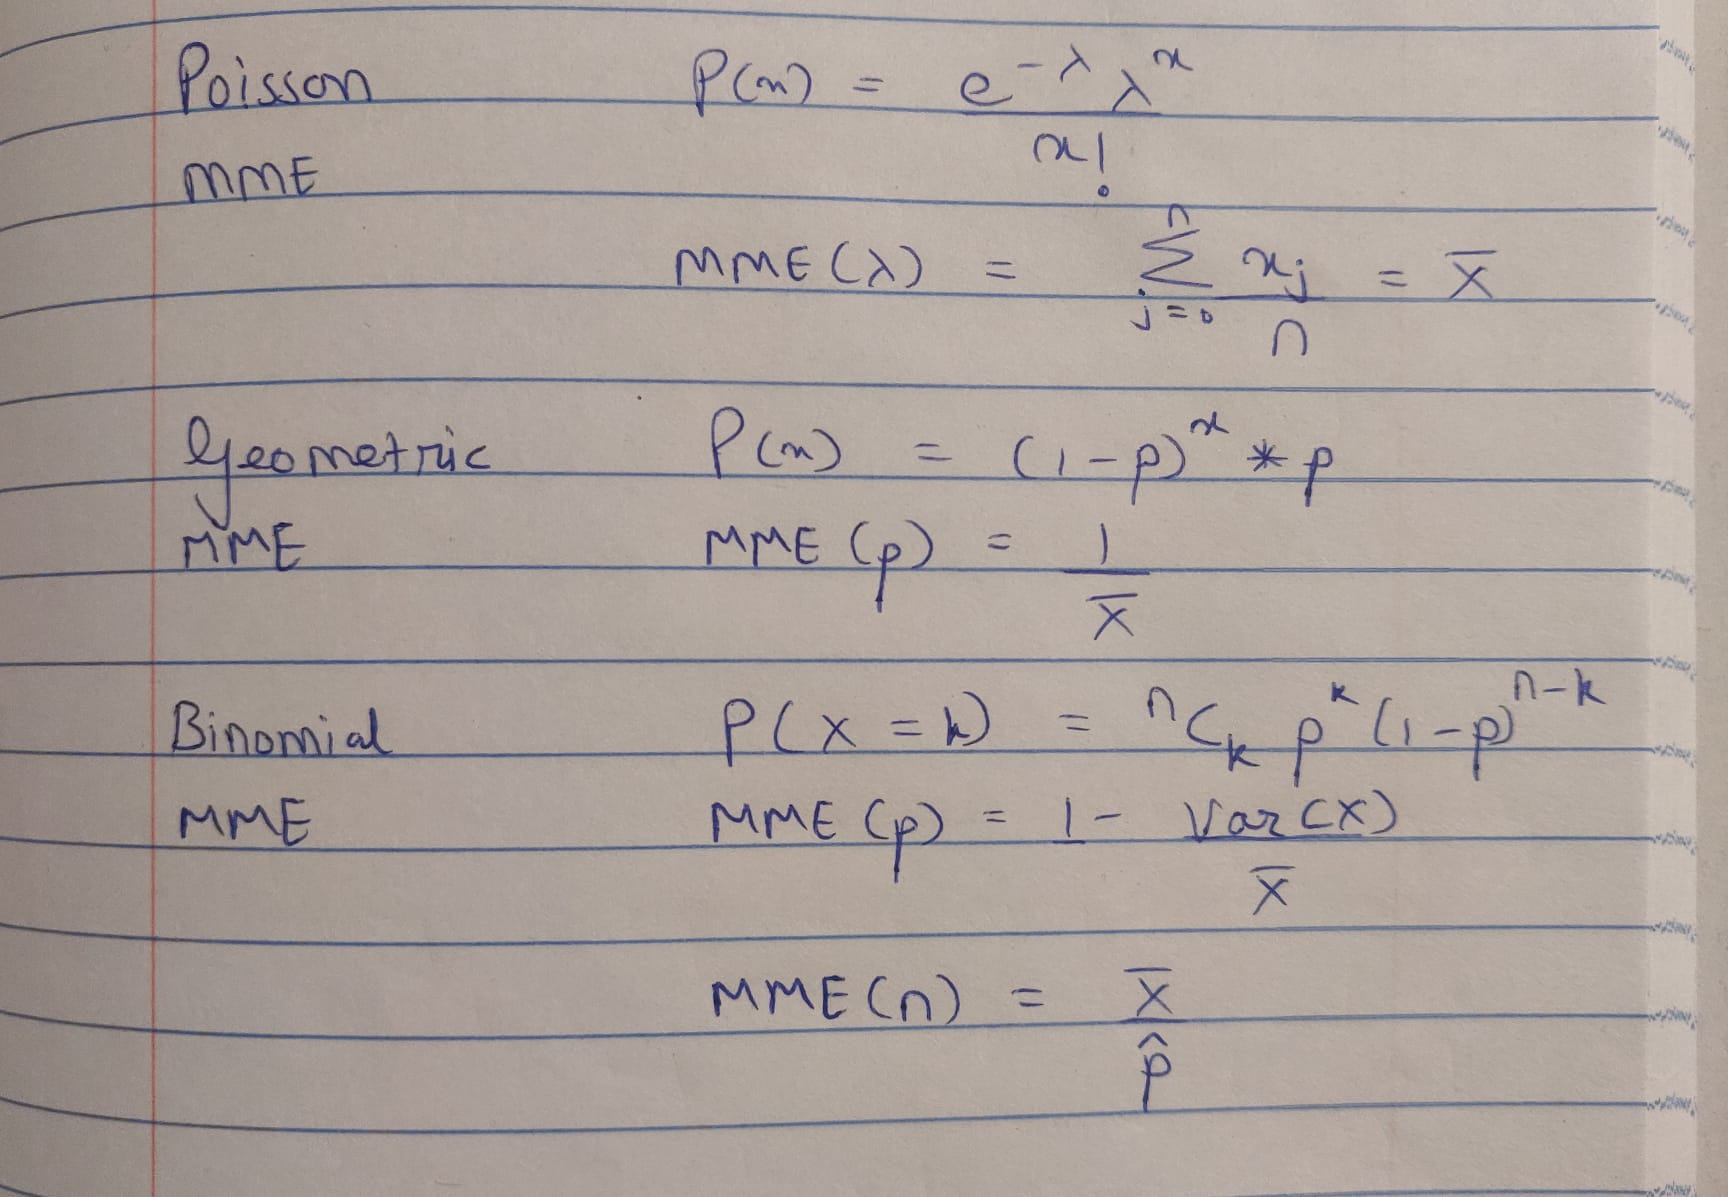

In [137]:
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import binom


data_18_20 = pd.DataFrame()
for index, row in data.iterrows():
    if '2018' in row['DATE'] or '2019' in row['DATE'] or '2020' in row['DATE']:
        data_18_20 = data_18_20.append(row, ignore_index=True)


x_bar = data_18_20['Monthly_Housing_Cost'].mean()
variance = data_18_20['Monthly_Housing_Cost'].var()
rent = sorted(data_18_20['Rent_of_Primary_residence'].tolist())

#poisson cdf
def poisson_cdf(x):
  lambda_mme = x_bar
  poisson_dist = poisson(lambda_mme)
  return poisson_dist.cdf(x) 

#binomial pdf
def binomial_cdf(x):
  p_mme = 1 - (variance/x_bar)
  n_mme = x_bar/p_mme
  binomial_dist = binom(n_mme, p_mme)
  return binomial_dist.cdf(x)

#geometric pdf
def geometric_cdf(x):
  pmme = 1/x_bar
  geometric_dist = geom(pmme)
  return geometric_dist.cdf(x) 


rent_ecdf = {}                                                                  
for r in rent:
  count = sum(1 for x in rent if x <= r)
  rent_ecdf[r] = count/len(rent)

def one_sampleks(X, F_X):
  maxvalue = 0
  for i in range(0,len(X)):
    FDminus, FDplus = 0, 1
    if i != 0:
      FDminus = rent_ecdf[X[i-1]]
    if i != len(X)-1:
      FDplus = rent_ecdf[X[i]]
    max_temp = max(abs(F_X[i] - FDplus), abs(F_X[i] - FDminus))
    if max_temp > maxvalue:
      maxvalue = max_temp
  return maxvalue


poisson = [poisson_cdf(x) for x in rent]
geometric = [geometric_cdf(x) for x in rent]
binomial = [binomial_cdf(x) for x in rent]
#approximating binomial cdf
binomial = [1 if math.isnan(x) else x for x in binomial]



print('KS Test for poisson is : ', one_sampleks(rent, poisson))
print('KS Test for geometric is : ', one_sampleks(rent, geometric))
print('KS Test for binomial is : ', one_sampleks(rent, binomial))


<ipython-input-137-db0b490d122c>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_18_20 = data_18_20.append(row, ignore_index=True)


KS Test for poisson is :  0.9709350135645295
KS Test for geometric is :  0.6758968422271779
KS Test for binomial is :  1


The KS statistic values are greater than the threshold of 0.05 which means that we reject H0. H0 is that the sample is from the given distribution. We can conclude that the sample is not from Poisson, Geometric and Binomial distribution.

KS statistic :  0.3333333333333334


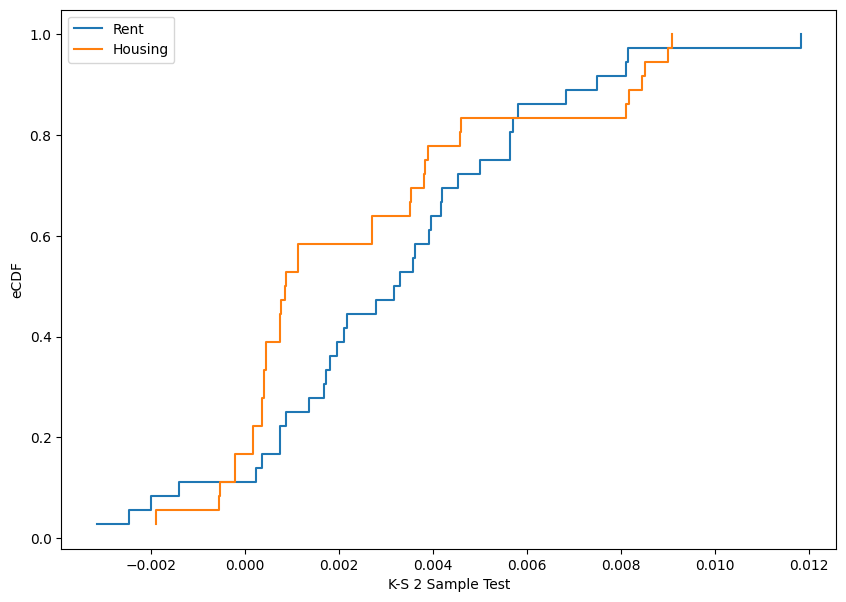

In [138]:
#2 sample KS test
#Between Rent and House data
house = sorted(data_18_20['Monthly_Housing_Cost_per_change'].tolist())
rent = sorted(data_18_20['Rent_of_Primary_residence_per_change'].tolist())

def eCDF(ls):
    ls.sort()
    p = 1/(len(ls))
    x = []
    f_x = []
    tot = p
    for i in range(0,len(ls)):
        x = x + [ls[i]]
        f_x = f_x + [tot]
        tot += p
    return x, f_x

def two_sample_ks_test(x, y, X, f_X, Y, f_Y):
  i=0
  j=0
  maxi=0
  while i<len(x) and j<len(y):
    if x[i] < y[j]:
      if j==0:
        F_x_cap=0
      else:
        F_x_cap = f_Y[Y.index(y[j-1])]
      if i==0:
        F_y_left=0
      else:
        F_y_left = f_X[X.index(X[i-1])]
      if i==len(X)-1:
        F_y_right=1
      else:
        F_y_right=f_X[X.index(x[i])]

      maxi_temp=max(abs(F_x_cap-F_y_left),abs(F_x_cap-F_y_right))
      if maxi_temp > maxi:
        maxi = maxi_temp
        index = i
      i+=1
    else:
      j+=1
  return maxi


rent.sort()
house.sort()
X, f_X = eCDF(rent)
Y, f_Y = eCDF(house)

KS_p_value = two_sample_ks_test(rent, house, X, f_X, Y, f_Y)

print('KS statistic : ', KS_p_value)
plt.figure('K-S test' , figsize=(10,7))
plt.xlabel("K-S 2 Sample Test")
plt.ylabel('eCDF')
    
plt.step(X, f_X, where='post', label="Rent")
plt.step(Y, f_Y, where='post', label="Housing")
plt.legend()
plt.show()




The KS statistic is 0.333 which is greater than 0.05, thus we can reject the null hypothesis that the two samples are from the same distribution. 

Permutation Test

In [139]:
def calculate_mean(arr):
  lst = arr.to_list()
  return sum(lst) / len(lst)

rent_mean = calculate_mean(data_18_20['Rent_of_Primary_residence_per_change'])
housing_mean = calculate_mean(data_18_20['Monthly_Housing_Cost_per_change'])
Tobs = abs(rent_mean - housing_mean)                                         

def permutations(n, d1, d2, Tobs):
  d1arr = np.array(d1.to_list())
  d2arr = np.array(d2.to_list())
  darr = np.append(d1arr, d2arr, axis=0)                                        #appending the two arrays
  ld1 = len(d1arr)
  ld2 = len(d2arr)
  extremes = 0                                                                  #calculates the cases where Ti > Tobs
  for i in range(0, n):                                                         #runs for the number of random permutations
    np.random.shuffle(darr)
    new_d1 = darr[0:ld1]
    new_d2 = darr[ld1:]
    Ti = abs(np.mean(new_d1) - np.mean(new_d2))
    if Ti > Tobs:
      extremes += 1
  return extremes / n

print('P value is : ', permutations(1000, data_18_20['Rent_of_Primary_residence_per_change'], data_18_20['Monthly_Housing_Cost_per_change'], Tobs))

P value is :  0.363


The P value comes out to be 0.366 which is greater than 0.05 thus we accept the null hypothesis that the samples are from the same distribution.

Normality Testing

QQ Plot

<ipython-input-140-4c9d4a1e9125>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_16_21 = data_16_21.append(row, ignore_index=True)


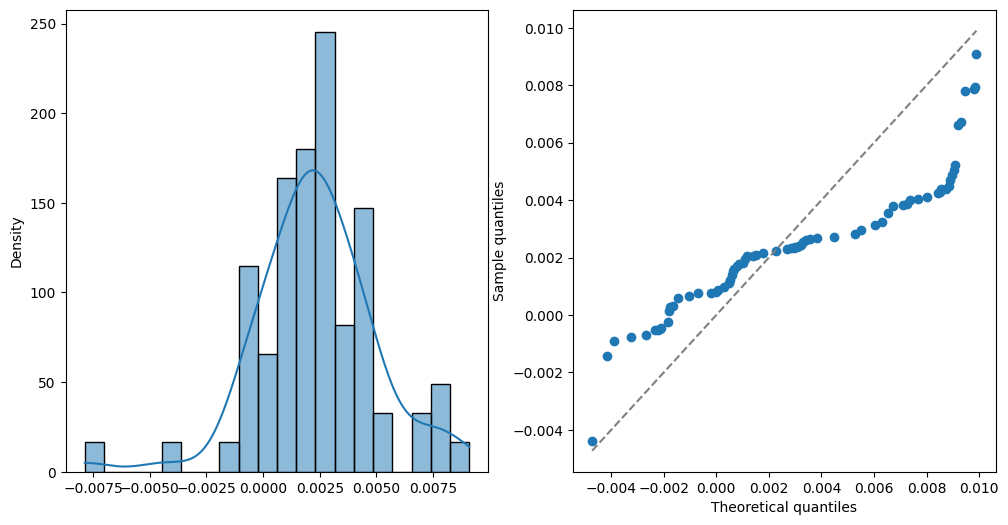

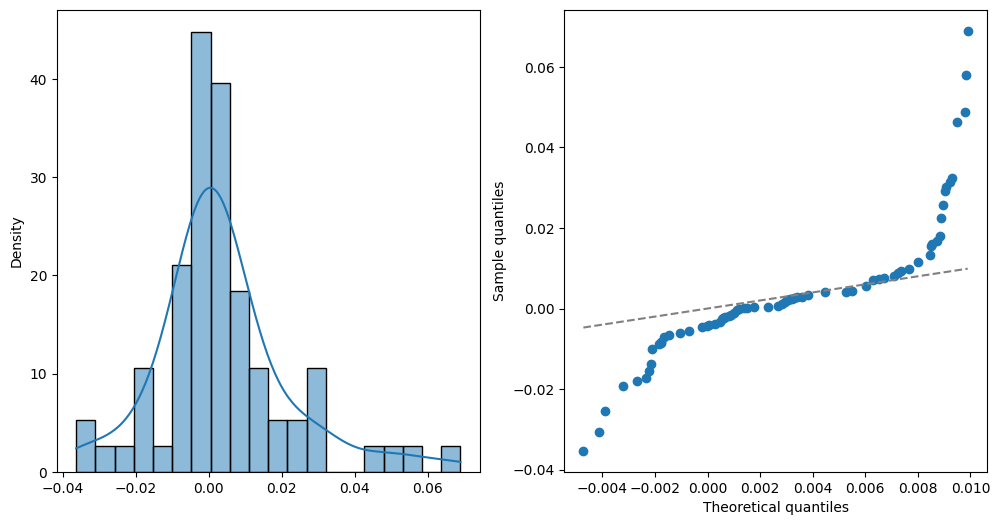

In [140]:
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

data_16_21 = pd.DataFrame()
for index, row in data.iterrows():
    if '2016' in row['DATE'] or '2017' in row['DATE'] or '2018' in row['DATE'] or '2019' in row['DATE'] or '2020' in row['DATE'] or '2021' in row['DATE']:
        data_16_21 = data_16_21.append(row, ignore_index=True)
#print(data_18_20)

# Generating samples from normal distribution
sample_size = len(data_16_21['CPI_Energy_per_change'])
energy = data_16_21['CPI_Energy_per_change'].tolist()
all_items = data_16_21['CPI_all_items_per_change'].tolist()

# Sorting the samples
energy_sorted = np.sort(energy)
all_items_sorted = np.sort(all_items)

#Getting truncated normal values within the range of the quantile values of the data.
X = get_truncated_normal(mean=0, sd=1, low=-0.005, upp=0.01)
scnorm = X.rvs(sample_size)
scnsorted = np.sort(scnorm)

# Calculate quantiles
p = np.arange(1, sample_size+1) / sample_size
q2 = np.quantile(energy_sorted, p)
q3 = np.quantile(all_items_sorted, p)
q4 = np.quantile(scnsorted, p)


# Plotting Q-Q plot for column 'All items'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(all_items_sorted, ax=ax1, bins=20, kde=True, stat='density')
plt.scatter(q4, q3)
ax2.plot([q4.min(), q4.max()], [q4.min(), q4.max()], '--', color='gray')
ax2.set_xlabel('Theoretical quantiles')
ax2.set_ylabel('Sample quantiles')
plt.show()

# Plotting Q-Q plot for column 'Energy'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(energy_sorted, ax=ax1, bins=20, kde=True, stat='density')
plt.scatter(q4, q2)
ax2.plot([q4.min(), q4.max()], [q4.min(), q4.max()], '--', color='gray')
ax2.set_xlabel('Theoretical quantiles')
ax2.set_ylabel('Sample quantiles')
plt.show()

We have used truncated Normal distribution as Theoretical quantiles, this is to clearly show the distribution through the scatter plot. 

We observe that the data is not actually normally distributed as the scatter plot does not align with the normal line.

Shapiro Test

In [141]:
import scipy.stats as stats

df = pd.read_csv("/content/drive/My Drive/ProbStatsProject/PerChangeDallas97-22.csv")
df = df.fillna(0)
all_items_col = df['CPI_all_items_per_change']
energy_col = df['CPI_Energy_per_change']

res1 = stats.shapiro(all_items_col)
print("Column: CPI_all_items_per_change' --> W statistic: "+str(res1[0])+", P-Value: "+str(res1[1]))
res2 = stats.shapiro(energy_col)
print("Column: CPI_Energy_per_change --> W statistic: "+str(res2[0])+", P-Value: "+str(res2[1]))

Column: CPI_all_items_per_change' --> W statistic: 0.9080091714859009, P-Value: 7.239740491132851e-13
Column: CPI_Energy_per_change --> W statistic: 0.8547593355178833, P-Value: 1.7685022234710225e-16


The p-values obtained above are less than 0.05 significance level. Thus we reject the null hypothesis that the distributions are normal. 
This means that the distributoins of the two columns are not normal.

3.3 Performing Wald’s test, Z-test and t-test


In this step, we want to check how the mean of monthly stats has changed
between 2020 and 2021 (if your dataset is from 1997-2022) and 1994 and 1995
(if your dataset is from 1970-1996). Apply the Wald’s test, Z-test, and t-test
(assume all are applicable) to check whether the mean of Consumer Price Index
for All Urban Consumers: Rent of Primary Residence in ‘assigned urban center’
and Consumer Price Index for All Urban Consumers: Energy in ‘assigned urban
center’ are different for given years in the urban center. Do this separately for
both columns, i.e., you have to compare mean of monthly stats from year 1 with
mean of monthly stats from year 2 separately for both columns. Use MLE for
Wald’s test as the estimator; assume for Wald’s estimator purposes that daily
data is Poisson distributed.

In [142]:
import pandas as pd
import numpy as np

In [143]:
data=pd.read_csv("/content/drive/My Drive/ProbStatsProject/CleanedDallas97-22.csv",sep=",")

In [144]:
data.head()

,Unnamed: 0,DATE,CPI_all_items,Rent_of_Primary_residence,Monthly_Housing_Cost,CPI_Energy,US_Dollar_Purchasing_power
0,0,1997-01-01,159.4,140.4,146.50,126.0,62.8
1,1,1997-02-01,159.7,140.5,137.90,129.2,62.6
2,2,1997-03-01,159.8,140.5,137.30,118.2,62.5
3,3,1997-04-01,159.9,141.0,136.70,107.2,62.4
4,4,1997-05-01,159.9,140.8,137.85,108.2,62.5


In [145]:
start_date = '2020-01-01'
end_date = '2021-12-31'
# Select DataFrame rows between two dates
mask = (data['DATE'] > start_date) & (data['DATE'] <= end_date)
data_3_3=data.loc[mask]
# Rent_of_Primary_residence and CPI_Energy
# (data_3_3.DATE.year==2021).Rent_of_Primary_residence.mean()
df2021=data_3_3.loc[(data_3_3["DATE"]>"2020-12-31")]
# df2021
df2020=data_3_3.loc[(data_3_3["DATE"]<="2020-12-31")]
# df2021

Since Poisson distribution is given we will have lambda equal to the mean

In [146]:
#lambda1 - 2020 and lambda2 - 2021

lambda1_energy=df2020.CPI_Energy.mean()
lambda1_rent=df2020.Rent_of_Primary_residence.mean()
X_bar1_energy=lambda1_energy
Y_bar1_rent=lambda1_rent
lambda2_rent=df2021.Rent_of_Primary_residence.mean()
lambda2_energy=df2021.CPI_Energy.mean()
X_bar2_energy=lambda2_energy
Y_bar2_rent=lambda2_rent

## Walds test
Given poisson distribution 
lambda mle= mean

walds test={X_bar-Y_bar}/sqrt(var(X_bar-Y_bar))

sqrt(var(X_bar-Y_bar))  =  sqrt(var(X1)*(1/n)+var(X2)*(1/m))
                        =  sqrt(lambda1*(1/n)+lambda2*(1/m))

H0 : lambda1==lambda2

In [147]:
def Walds(X_bar,Y_bar,n,m):
    res=(X_bar-Y_bar)/np.sqrt((X_bar/n)+(Y_bar/m))
    return res

In [148]:
walds_energy=Walds(lambda1_energy,lambda2_energy,df2020.CPI_Energy.shape[0],df2021.CPI_Energy.shape[0])

In [149]:
walds_energy

-2.6417546664051983

|Walds_energy|>1.96 reject H0;
here we reject null hypothesis
hence lambda1!=lambda2

so the mean changes for CPI_Energy

p- value= 2(1-phi(|w|))   i.e around 0.00836  which is less than 0.05 value so rejecting null hypothesis

In [150]:
walds_rent=Walds(lambda1_rent,lambda2_rent,df2020.Rent_of_Primary_residence.shape[0],df2021.Rent_of_Primary_residence.shape[0])

In [151]:
walds_rent

-1.312849226097177

|Walds_rent|<1.96 accept H0;
here we accept null hypothesis
hence lambda1==lambda2

So the mean remain same for CPI Rent

p- value= 2(1-phi(|w|))   i.e around 0.1902 which is greator than 0.05 value so accept null hypothesis

## Z-Test

varience is known
z= (x̄1 – x̄2 ) / √((σ1 )²/n1 + (σ2)²/n2)

In [152]:
def sigma_square(x):
    res,s=0,0
    #summantion of xi and x bar:
    for i in range(len(x)):
       s+=((x[i]-np.mean(x))**2)
    return (1/(len(x)-1))*s

In [153]:
def Z_test(X_bar,Y_bar,n,m):
    res=(X_bar-Y_bar)/np.sqrt((X_bar/n)+(Y_bar/m))
    return res

In [154]:
Z_test_energy=Z_test(lambda1_energy,lambda2_energy,df2020.CPI_Energy.shape[0],df2021.CPI_Energy.shape[0])
Z_test_energy

-2.6417546664051983

|Z-Test| > 1.96
so null hypothesis is rejected 
mean of energy changes with year

In [155]:
Z_test_Rent=Z_test(lambda1_rent,lambda2_rent,df2020.Rent_of_Primary_residence.shape[0],df2021.Rent_of_Primary_residence.shape[0])
Z_test_Rent

-1.312849226097177

|Z-Test| < 1.96
so null hypothesis is accepted 
mean of rent is same with year

## T- Test
https://libguides.library.kent.edu/spss/independentttest#:~:text=The%20Independent%20Samples%20t%20Test%20compares%20the%20means%20of%20two,Independent%20t%20Test

In [156]:
def s_square(x):
    res,s=0,0
    #summantion of xi and x bar:
    for i in range(len(x)):
       s+=((x[i]-np.mean(x))**2) 
    return (1/(len(x)-1))*s

In [157]:
def T_Test(X_bar,Y_bar,df1,df2):
    res=(X_bar-Y_bar)/np.sqrt((s_square(df1.to_numpy())/df1.shape[0])+(s_square(df2.to_numpy())/df2.shape[0]))
    return res

In [158]:
T_test_energy=T_Test(lambda1_energy,lambda2_energy,df2020.CPI_Energy,df2021.CPI_Energy)
T_test_energy

-3.0081906840218235

if | T_test_energy |>t(0.025,11) /  2.200985

we reject Null hypothesis.
hence mean for energy is diffrent in 2020 and 2021

In [159]:
T_test_Rent=T_Test(lambda1_rent,lambda2_rent,df2020.Rent_of_Primary_residence,df2021.Rent_of_Primary_residence)
T_test_Rent

-6.082768916719216

if | T_test_energy |>t(0.025,11) /  2.200985

we reject Null hypothesis.
hence mean for energy is diffrent in 2020 and 2021

In [160]:
import pandas as pd
import numpy as np
data1=pd.read_csv("/content/drive/My Drive/ProbStatsProject/PerChangeDallas97-22.csv")
data1.columns
import seaborn as sns

In [161]:
import matplotlib.pyplot as plt

In [162]:
def s(x,y):
    return sns.regplot(x,y,ci=None,color='red')

In [163]:
def Linear1(X,Y):
  X_T=X.T
  B = np.linalg.inv(X_T @ X) @ X_T @ Y
  B.index=X.columns
  print(B)
  pred=X @ B
  B.index=X.columns
  print("SSE:",((Y - pred) ** 2).sum())
  plt.plot(X.iloc[:,1],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,1],Y,color='b',label="Actual")
  plt.legend()
  # s(Y,pred)
  # sns.regplot(x=Y,y=pred,ci=None,color='red')

1. US Dollar Purchasing Power per change
(CPI All items per change vs US Dollar Purchasing Power per change)

                                       CPI_all_items_per_change
intercept                                              0.000745
US_Dollar_Purchasing_power_per_change                 -0.643533
SSE: CPI_all_items_per_change    0.000907
dtype: float64


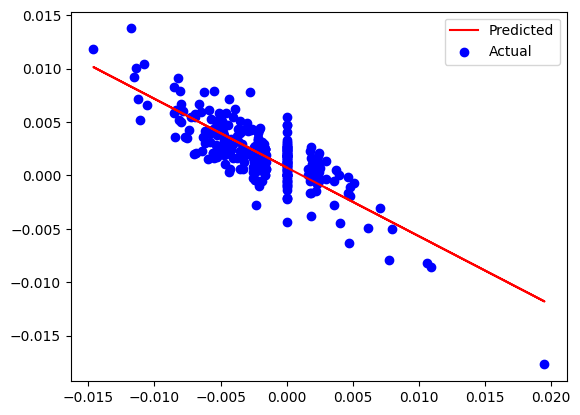

In [164]:
data1["intercept"]=1
data1=data1.fillna(0)
Linear1(data1.loc[:,['intercept','US_Dollar_Purchasing_power_per_change']],data1.loc[:,['CPI_all_items_per_change']])

2. CPI Energy per change
(CPI All items per change vs [US Dollar Purchasing Power per change, CPI Energy per change])

In [165]:
def Linear2(X,Y):
  X_T=X.T
  B = np.linalg.inv(X_T @ X) @ X_T @ Y
  B.index=X.columns
  # print(B)
  pred=X @ B
  B.index=X.columns
  print("SSE:",((Y - pred) ** 2).sum())
  fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharey=True)
  plt.subplot(2, 1, 1)
  plt.plot(X.iloc[:,1],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,1],Y,color='b',label="Actual")
  plt.subplot(2, 1, 2)
  plt.plot(X.iloc[:,2],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,2],Y,color='b',label="Actual")
  # sns.regplot(x=Y,y=pred,ci=None,color='red')
  plt.legend()

SSE: CPI_all_items_per_change    0.000906
dtype: float64


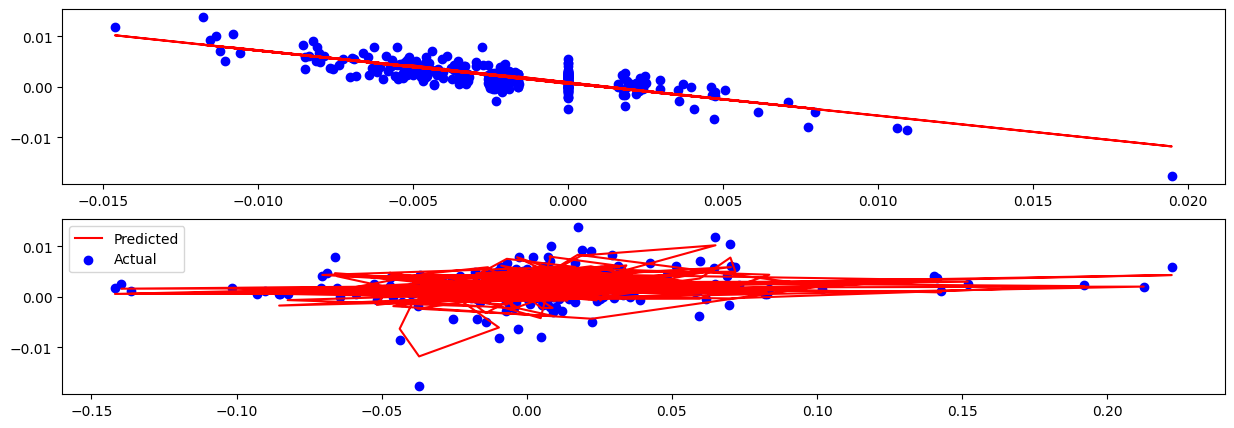

In [166]:
Linear2(data1.loc[:,['intercept','US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change']],data1.loc[:,['CPI_all_items_per_change']])

3. Monthly Housing Cost per change
(CPI All items per change vs [US Dollar Purchasing Power per change, CPI Energy per change,
Monthly Housing Cost per change])

In [167]:
def Linear3(X,Y):
  X_T=X.T
  B = np.linalg.inv(X_T @ X) @ X_T @ Y
  B.index=X.columns
  # print(B)
  pred=X @ B
  B.index=X.columns

  # print(X)
  print("SSE:",((Y - pred) ** 2).sum())
  sns.regplot(x=Y,y=pred,ci=None,color='red')
  plt.subplot(3, 1, 1)
  plt.plot(X.iloc[:,1],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,1],Y,color='b',label="Actual")
  plt.subplot(3, 1, 2)
  plt.plot(X.iloc[:,2],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,2],Y,color='b',label="Actual")
  plt.subplot(3, 1, 3)
  plt.plot(X.iloc[:,3],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,3],Y,color='b',label="Actual")
  plt.legend()

In [168]:
x=data1.loc[:,['intercept','US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change','Monthly_Housing_Cost_per_change']]
x.iloc[:,3]

0      0.000000
1     -0.058703
2     -0.004351
3     -0.004370
4      0.008413
         ...   
307    0.017422
308    0.017127
309    0.016838
310    0.016556
311    0.016290
Name: Monthly_Housing_Cost_per_change, Length: 312, dtype: float64

SSE: CPI_all_items_per_change    0.000894
dtype: float64


<ipython-input-167-f6a924f5ccfc>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


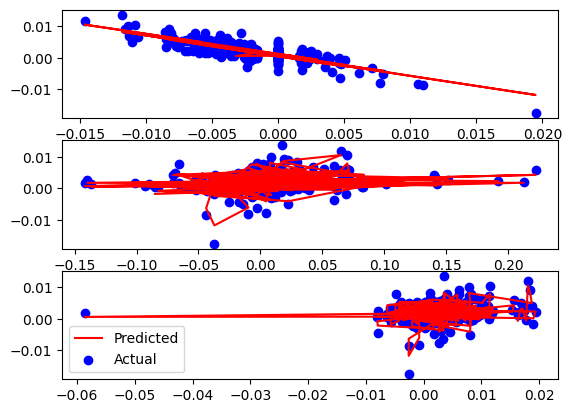

In [169]:
Linear3(data1.loc[:,['intercept','US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change','Monthly_Housing_Cost_per_change']],data1.loc[:,['CPI_all_items_per_change']])

4. Rent of Primary residence per change
(CPI All items per change vs [US Dollar Purchasing Power per change, CPI Energy per change,
Monthly Housing Cost per change, Rent of Primary residence per change])
In each step, we repeat the experiment with one extra column added. Plot the
original data and the regression fit, and report the SSE in each linear regression
experiment. Comment on which variables are most relevant in predicting
the CPI All items per change based on the linear regression experiments performed.

In [170]:
def Linear4(X,Y):
  X_T=X.T
  B = np.linalg.inv(X_T @ X) @ X_T @ Y
  B.index=X.columns
  # print(B)
  pred=X @ B
  B.index=X.columns

  # print(X)
  print("SSE:",((Y - pred) ** 2).sum())
  sns.regplot(x=Y,y=pred,ci=None,color='red')
  plt.subplot(4, 1, 1)
  plt.plot(X.iloc[:,1],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,1],Y,color='b',label="Actual")
  plt.subplot(4, 1, 2)
  plt.plot(X.iloc[:,2],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,2],Y,color='b',label="Actual")
  plt.subplot(4, 1, 3)
  plt.plot(X.iloc[:,3],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,3],Y,color='b',label="Actual")
  plt.subplot(4, 1, 4)
  plt.plot(X.iloc[:,4],pred,color='r',label="Predicted")
  plt.scatter(X.iloc[:,4],Y,color='b',label="Actual")
  plt.legend()

SSE: CPI_all_items_per_change    0.000894
dtype: float64


<ipython-input-170-e4ffc7faacc8>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 1, 1)


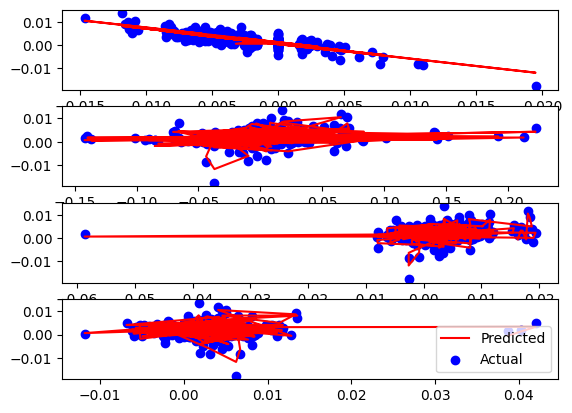

In [171]:
Linear4(data1.loc[:,['intercept','US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change','Monthly_Housing_Cost_per_change','Rent_of_Primary_residence_per_change']],data1.loc[:,['CPI_all_items_per_change']])

Because multiple linear regression makes hyper plane we are seeing a squiggle in the graph which represents, for same value of x1 input variable we are getting different value of y as value of input variable x2 changes

when input variables are : 'US_Dollar_Purchasing_power_per_change','CPI_Energy_per_change','Monthly_Housing_Cost_per_change' the SSE is least which is 0.000894

In [184]:
import pandas as pd
import numpy as np

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("/content/drive/My Drive/ProbStatsProject/CleanedDallas97-22.csv")
df['DATE']= pd.to_datetime(df['DATE']).dt.year

# Select the columns "Monthly Housing" and "All Items in the Urban Center" for the years 1972-1996
data = df[(df['DATE'] >= 1997) & (df['DATE'] <= 2021)][["Monthly_Housing_Cost", "CPI_all_items","DATE"]]



In [173]:
# Fill in missing values with the average value for that year
data = data.groupby('DATE').transform(lambda x: x.fillna(x.mean()))


In [174]:
data.isna().sum()

Monthly_Housing_Cost    0
CPI_all_items           0
dtype: int64

In [175]:
# Categorize the data into high and low using the median value as a threshold
median_housing = np.median(data["Monthly_Housing_Cost"])
median_all_items = np.median(data["CPI_all_items"])
data["Category_Monthly_Housing_Cost"] = np.where(data["Monthly_Housing_Cost"] > median_housing, "high", "low")
data["Category_CPI_all_items"] = np.where(data["CPI_all_items"] > median_all_items, "high", "low")

In [176]:

# Create a contingency table
contingency_table = pd.crosstab(data["Category_Monthly_Housing_Cost"], data["Category_CPI_all_items"])

In [177]:
data[data.Category_CPI_all_items=='low'].shape

(150, 4)

In [178]:
contingency_table

Category_CPI_all_items,high,low
Category_Monthly_Housing_Cost,,
high,135,15
low,15,135


In [179]:
# Perform chi-square analysis and calculate p-value manually
observed = contingency_table.values
row_totals = observed.sum(axis=1)
column_totals = observed.sum(axis=0)
total = observed.sum()
expected = np.outer(row_totals, column_totals) / total
chi2 = np.sum((observed - expected)**2 / expected)
df = (len(row_totals) - 1) * (len(column_totals) - 1)



In [180]:
chi2

192.0

P-Value is calculated manually taking degree of freedom = 1 and chi square statistic 192 comes out to be less than 0.00001. p-value < 0.05 so we reject the null hypothesis so monthly housing and all item are not independent

3.6 Time Series Analysis

In [181]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

def cal_MSE(output):
    return round(sum((output[:,0]-output[:,1])**2)/len(output), 3)

def cal_mape(output):
    true = output[:,0]
    pred = output[:,1]
    return np.round(np.mean(np.abs((true - pred)/true))*100, 3)


df = pd.read_csv("/content/drive/My Drive/ProbStatsProject/CleanedDallas97-22.csv")
df = df.iloc[:, 1:]
df['DATE'] = pd.to_datetime(df.DATE)

data = df[(df['DATE'] >= '2018-01-01') & (df['DATE'] <= '2021-12-01')]

train_frame = data[(data['DATE'] >= '2018-01-01') & (data['DATE'] <= '2020-12-01')][['DATE','Rent_of_Primary_residence']]
test_frame = data[(data['DATE'] >= '2021-01-01') & (data['DATE'] <= '2021-12-01')][['DATE','Rent_of_Primary_residence']]

train = train_frame['Rent_of_Primary_residence'].tolist()
test = test_frame['Rent_of_Primary_residence'].tolist()

EWMA

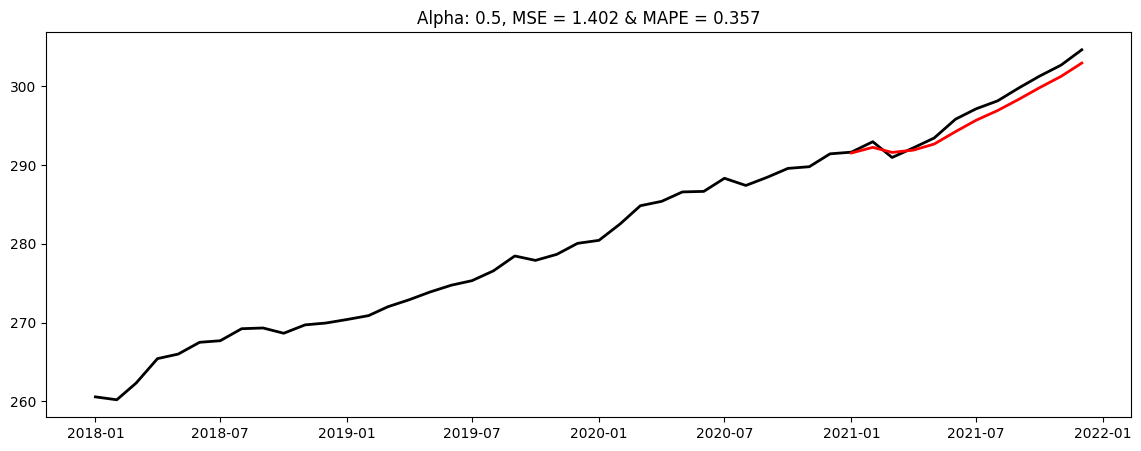

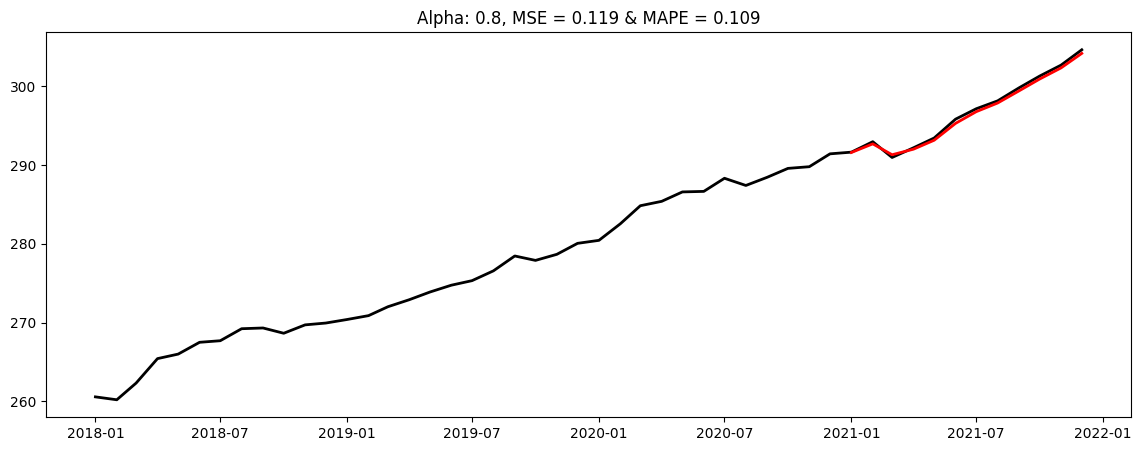

In [182]:
def ewma(alpha, col):
    ewma = [col[0]]
    for i in range(1, len(col)):
        ewma.append(alpha * col[i] + (1 - alpha) * ewma[i-1])
    return ewma

def pred_ewma(model, alpha, col):
    prediction = [train[-1]]
    for i in range(0, len(col)):
        prediction.append(alpha * col[i] + (1 - alpha) * prediction[-1])
    return np.array(prediction[1:])

def run_ewma(alpha, train, test):
    model = ewma(alpha, train)
    pred = pred_ewma(model, alpha, test)

    output = np.array([[i[0], i[1]]  for i in zip(test, pred)])
    plt.figure(figsize=(14, 5))
    plt.plot(data['DATE'], train+output[:, 0].tolist(), linewidth=2, color='Black')
    plt.plot(test_frame['DATE'], output[:, 1], linewidth=2, color='red')
    plt.title("Alpha: "+str(alpha)+ ", MSE = "+str(cal_MSE(output))+" & MAPE = "+str(cal_mape(output)))
    plt.show()
    
alpha1=0.5
alpha2=0.8
run_ewma(alpha1, train, test)
run_ewma(alpha2, train, test)

# Auto-Regression

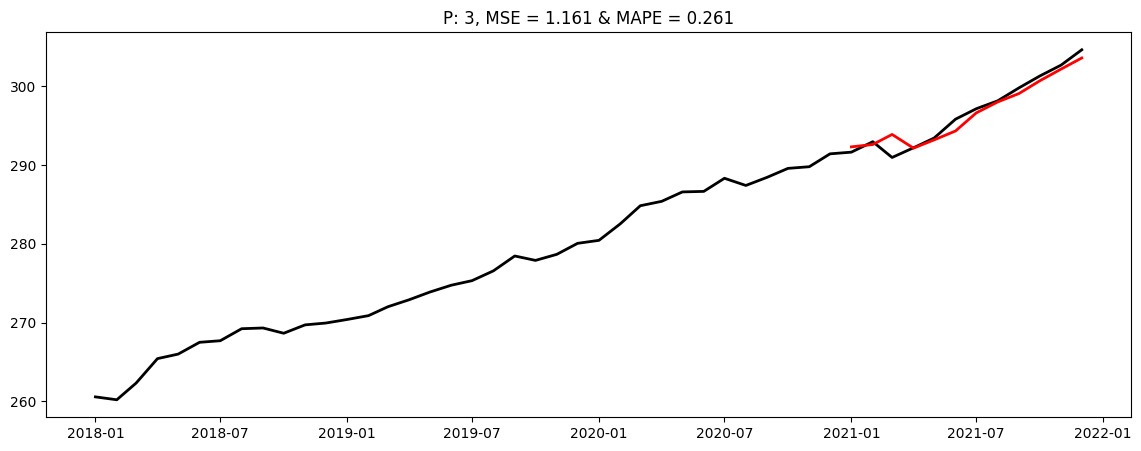

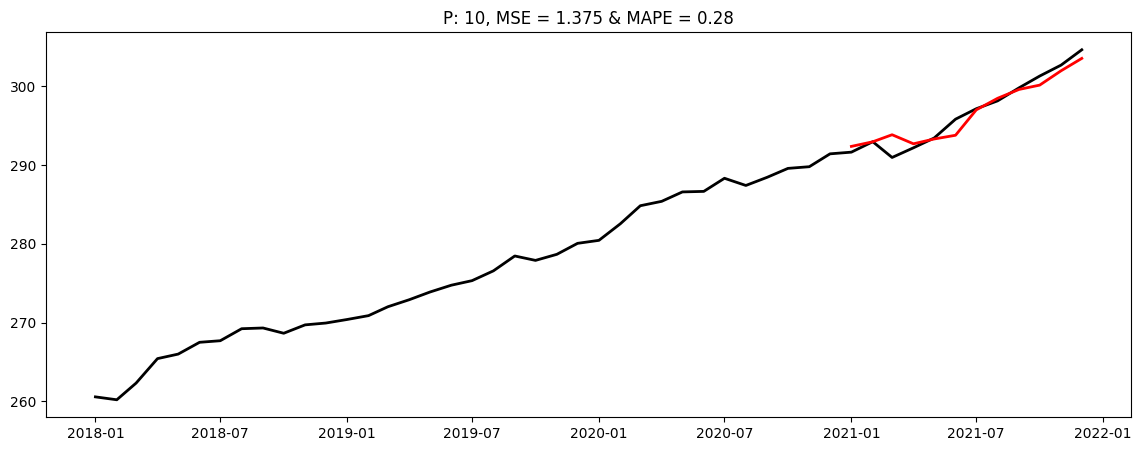

In [183]:
def get_feature(p, data, pred=False, init=None):
    X = []
    Y = []
    if pred: 
        X.append(init)
        Y.append(data[0])
        for i in range(1, p):
            tmp = X[-1]
            tmp = tmp[1:]
            tmp.append(Y[-1])
            X.append(tmp)
            Y.append(data[i])
   
    for i in range(p, len(data)):
        X.append([data[i - idx] for idx in range(1, p+1)][::-1])
        Y.append(data[i])
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

def AutoRegression(p, data):
    X, Y = get_feature(p, data, False)
    beta_cap = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return beta_cap

def AutoRegPred(p, beta_cap, data, init):
    X, Y = get_feature(p, data, True, init)
    pred = np.dot(beta_cap, X.T)
    return Y, pred.tolist()

def run_auto_regression(p, train, test):
    true, pred = AutoRegPred(p, AutoRegression(p, train), test, train[-p:])
    output = np.array([[i[0],i[1]] for i in zip(true, pred)])


    plt.figure(figsize=(14, 5))
    plt.plot(data['DATE'], train+output[:, 0].tolist(), linewidth=2, color='Black')
    plt.plot(test_frame['DATE'], output[:, 1], linewidth=2, color='red')
    plt.title("P: "+str(p)+ ", MSE = "+str(cal_MSE(output))+" & MAPE = "+str(cal_mape(output)))
    plt.show()
    
p1 = 3
p2 = 10
run_auto_regression(p1, train, test)
run_auto_regression(p2, train, test)